In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq, fftshift

## Problem 1: Integration of SIR Model

Creating integrator 

Text(0.5, 0, 'Time')

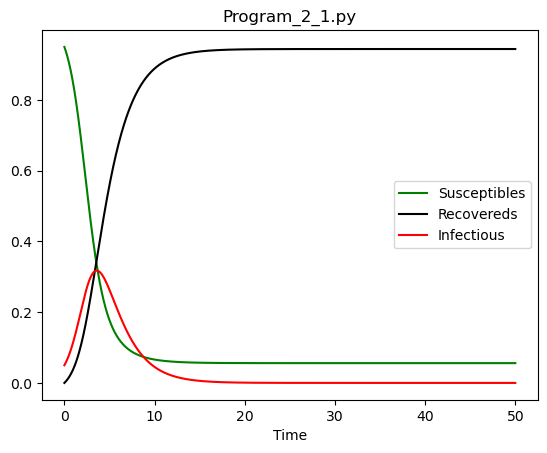

In [2]:
gamma=0.5
beta= gamma * 3
R0 = beta/gamma
TS=1.0
ND=70.0
I0=0.05
S0=1-I0

# Defining system of equations
X=np.zeros(3) 
X[0] = - beta * X[0] * X[1]   #dS
X[1] = beta * X[0] * X[1] - gamma * X[1]   # dI
X[2] = gamma * X[1]    # dR

R0 = beta/gamma
TS=1.0
ND=70.0
I0=0.05
S0=1-I0
dt = 0.1
recovered = 0

time = np.arange(0, 50, 0.01)
initial = [S0, I0, 0]

def integrate(system, initial_conditions, t):
    solution = odeint(system, initial_conditions, t)
    return solution

def diff_eqs(values,t):   
    X = np.zeros(3) 
    X[0] = - beta * values[0] * values[1]   #dS
    X[1] = beta * values[0] * values[1] - gamma * values[1]   # dI
    X[2] = gamma * values[1]    # dR
    return X   # For odeint


RES = odeint(diff_eqs, initial, time)
plt.plot(time,RES[:,0], '-g', label='Susceptibles')
plt.plot(time,RES[:,2], '-k', label='Recovereds')
plt.plot(time,RES[:,1], '-r', label='Infectious')
plt.legend(loc=0)
plt.title('Program_2_1.py')
plt.xlabel('Time')

In [3]:
def phase_plot(x_list,y_list):
    for k in range(len(s_list)):
        I0 = y_list[k]
        S0 = x_list[k]
        initial = [S0, I0, 0]
        RES = odeint(diff_eqs, initial, time)
        x = RES[:, 0]
        y = RES[:, 1]
        plt.plot(x,y, '-c')
        
    plt.scatter(x_list, y_list, marker = '.', color = 'b')
    plt.plot(x_list, y_list,'0.5')
    plt.xlim(0,1)
    plt.ylim(0,1)
    
dx = 0.05
s_list = np.arange(0,1+dx, dx)
i_list = s_list[::-1]
gamma=0.5

Calculating phase diagram for both cases

### Case A: No epidemic

R0 = 3.0


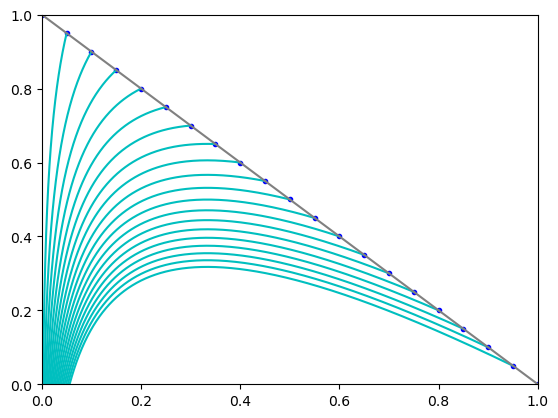

In [4]:
beta= gamma * 3
R0 = beta/gamma
print(f"R0 = {R0}")
phase_plot(i_list,s_list)

### Case B: Epidemic

R0 = 0.8


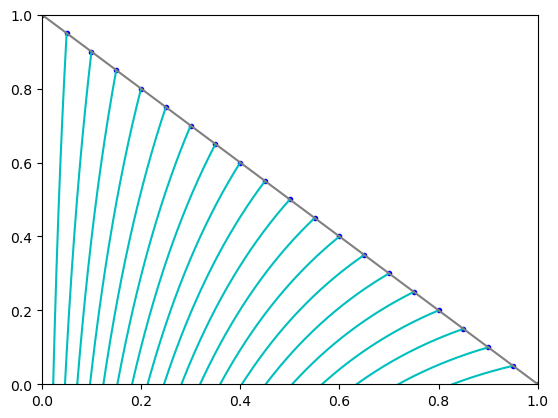

In [5]:
beta= gamma * 0.8
R0 = beta/gamma
print(f"R0 = {R0}")

phase_plot(i_list,s_list)

## Problem 1.2: Demography

In [6]:
from scipy.optimize import curve_fit

In [7]:
def diff_eqs2(values,t, gamma, beta):   
    X = np.zeros(3) 
    X[0] = - beta * values[0] * values[1]   #dS
    X[1] = beta * values[0] * values[1] - gamma * values[1]   # dI
    X[2] = gamma * values[1]    # dR
    return X   # For odeint

def cool_integration(time, gamma, beta):
    N = 763
    IO = 1/763
    SO = 1-IO
    initial = [SO, IO, 0]
    RES = odeint(diff_eqs2, initial, time, args = (gamma, beta))
    infected = RES[:, 1]
    return infected



[0.44760972 1.66511383]


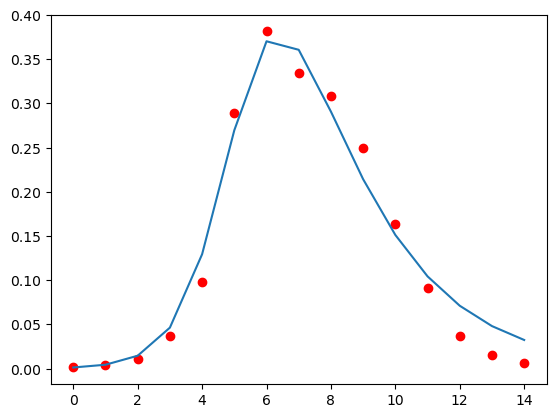

In [8]:
N = 763

# Data given from question
x_data = np.array([x for x in range(0,15)])
y_data = np.array([1,3,8,28,75,221,291,255,235,190,125,70,28,12,5])/N

IO = 1/763
SO = 1-IO
initial = [SO, IO, 0]

# Fit the function to the data
params, covariance = curve_fit(cool_integration, x_data, y_data)
print(params)
# Parameters 'beta' and 'gamma' are stored in 'params'
# best_fit_beta, best_fit_gammcca = params

model = odeint(diff_eqs2, initial, x_data, args = (params[0], params[1]))[:,1]
plt.plot(x_data, model)
plt.scatter(x_data,y_data,color= 'r')

## Problem 2 Demography

### 1. Adding birth and death rate

Reproductive ratio is: 19.972640218878247, beta: 0.6666666666666666, gamma: 0.03333333333333333


Text(0.5, 0, 'Days')

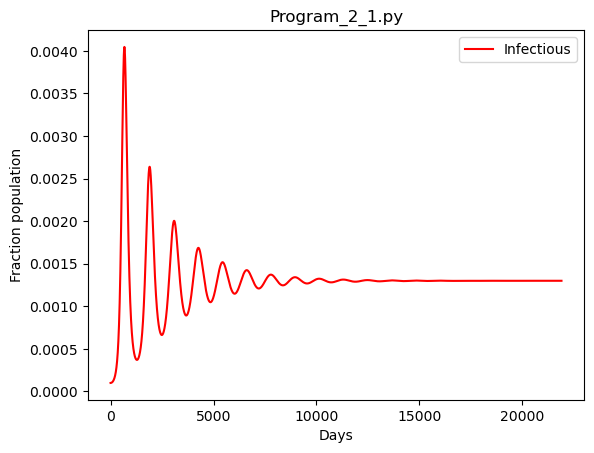

In [97]:
# ALL RATES ARE IN DAYS(they must be same scale)
expected_lifespan = 365*60
# 1/mu = Expected natural lifespan of someone in the population
mu = 1/(expected_lifespan)

# gamma = 1/infectious period
gamma = 1/30
 
beta = gamma*20

# Reproductive ratio must be larger than 1 for epidemic to start
reproductive  = beta/(gamma + mu)

print(f"Reproductive ratio is: {reproductive}, beta: {beta}, gamma: {gamma}")
# beta is probability of transmission (density dependent)

I0 = 0.0001
S0 = 0.05
R0 = 1-I0-S0

# gamma=1/7
# beta= gamma / 365

time_upperbound = int(expected_lifespan) #Expresses number of years
timestep = 1 #1 day
time = np.arange(0,time_upperbound,timestep)
reproductive = beta/(gamma + mu)

initial_values = [S0, I0, R0]

def SIR_2(initial, t, gamma, beta, mu):   
    Y = np.zeros(3) 
    Y[0] = mu - beta * initial[0] * initial[1] - mu * initial[0]
    Y[1] = beta * initial[0] * initial[1] - gamma * initial[1] - mu * initial[1]
    Y[2] = gamma * initial[1] - mu * initial[2]
    return Y   

sir2_output = odeint(SIR_2, initial_values, time, args = (gamma, beta, mu))

#Ploting
# plt.plot(time,RES[:,0], '-g', label='Susceptibles')
# plt.plot(time,RES[:,2], '-k', label='Recovereds')
plt.plot(time,sir2_output[:,1], '-r', label='Infectious')
plt.legend(loc=0)
plt.title('Program_2_1.py')
plt.ylabel('Fraction population')
plt.xlabel('Days')

### Applying fourier analysis

A is :1154.2937486480641)
G is :29.95896032831737)
T is :1168.4265292580371)
Approximated frequency of oscilation: 0.0008558518443046738


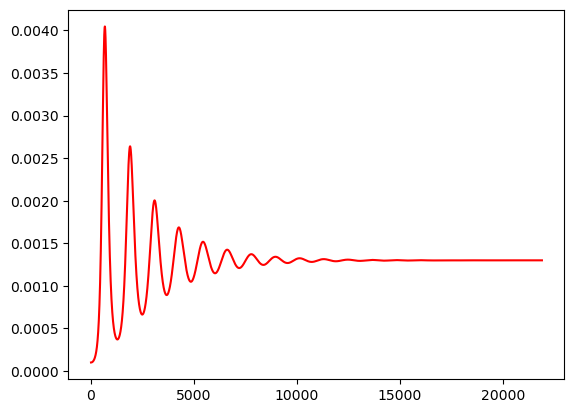

In [101]:
# Taking from the book, period of the damped oscilation should be proportional to A and G 

# Definition of A
A= 1/(mu*(reproductive-1))

# Definition of G
G = 1/(mu + gamma)

# Approximation of T 
T = 2*np.pi*np.sqrt(A*G)

# Frequency 
osc_freq = 1/T
print(f"A is :{A})")
print(f"G is :{G})")
print(f"T is :{T})")
print(f"Approximated frequency of oscilation: {osc_freq}")

plt.plot(time,sir2_output[:,1], '-r', label='Infectious')
# plt.plot(time, np.sin(time))

dominant frequency is 0.0007762557077625571
[4.56621005e-05 9.13242009e-05 1.36986301e-04 ... 4.99863014e-01
 4.99908676e-01 4.99954338e-01]


(0.0, 0.0005)

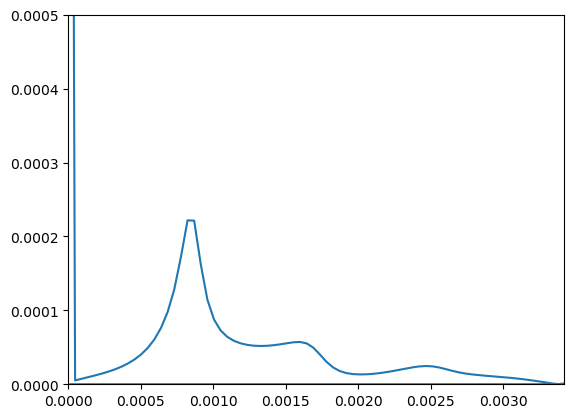

In [143]:
from scipy import fftpack

infected = sir2_output[:,1]
# infected_relevant = infected[0:15000]

# apply fourier analysis
fourier = np.abs(fftpack.fft(infected))/(len(infected)/2)

# get the frequencies for which it analyses
freqs = fftpack.fftfreq(len(infected))

indx = np.argmax(fourier[1:])
dom_frequency = freqs[indx]

print(f"dominant frequency is {dom_frequency}")
print(freqs2)
plt.plot(freqs, fourier.real)
plt.xlim(0.0000,4*osc_freq)
plt.ylim(0,0.0005)

# indx = np.argmax()
# # plt.yscale('log')
# # plt.xscale('log')



0.001299587710880799


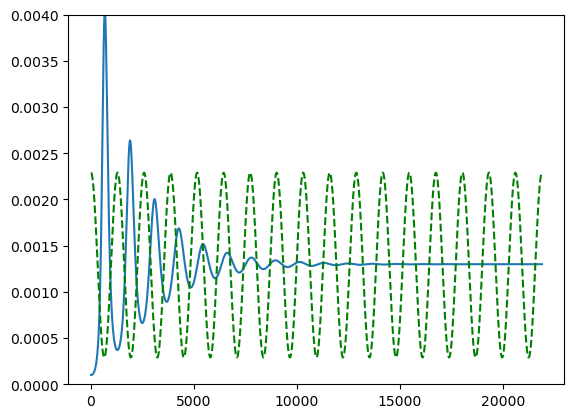

In [157]:
plt.plot(time, infected)
sine_wave = 0.00129 + 0.001*np.cos(2 * np.pi * dom_frequency * time)
plt.plot(time,sine_wave, color='g', linestyle='--')

plt.ylim(0,0.004)
print(infected[-1])

### 2.1 Adding infection induced mortality

## Problem 3: Variants of the SIR model